In [1]:
import numpy as np
import pandas as pd
import datetime
import os

from matplotlib import pyplot as plt

In [2]:
df_covid = pd.read_csv('C:/Users/soumya/Desktop/COVID-19-master/novel-corona-virus-2019-dataset/covid_19_data .csv')
df_covid['Date'] = pd.to_datetime(df_covid['ObservationDate'])
df_covid['Outbreak'] = "COVID_2019"
df_covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [3]:
df_sars = pd.read_csv('C:/Users/soumya/Desktop/COVID-19-master/novel-corona-virus-2019-dataset/sars_2003_complete_dataset_clean.csv')
df_sars['Date'] = pd.to_datetime(df_sars['Date'])
df_sars['Province/State'] = None 
df_sars['Outbreak'] = 'SARS_2003'
print(df_sars.columns)
df_sars.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)
df_sars.columns

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'Province/State', 'Outbreak'],
      dtype='object')

In [4]:
temp = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid[temp], df_sars[temp]])

df = df.reset_index(drop=True)

In [5]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])

In [6]:
df.head()

,Outbreak,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
2663,COVID_2019,Others,Azerbaijan,2020-02-28,1.0,0.0,0.0
4674,COVID_2019,Others,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2258,COVID_2019,Others,Afghanistan,2020-02-24,1.0,0.0,0.0
2351,COVID_2019,Others,Afghanistan,2020-02-25,1.0,0.0,0.0
2452,COVID_2019,Others,Afghanistan,2020-02-26,1.0,0.0,0.0


In [7]:
df = df.groupby(['Outbreak', 'Country/Region', 'Province/State', 'Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'

In [8]:
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed
0,COVID_2019,Azerbaijan,all,2020-02-28,1.0
1,COVID_2019,"('St. Martin',)",all,2020-03-10,2.0
2,COVID_2019,Afghanistan,all,2020-02-24,1.0
3,COVID_2019,Afghanistan,all,2020-02-25,1.0
4,COVID_2019,Afghanistan,all,2020-02-26,1.0


In [9]:
t = df.groupby(['Outbreak', 'Country/Region', 'Province/State', 'Date']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] > 50]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State', 'Date'], right_index=True)

In [10]:
df['Country/Region'].value_counts()

Mainland China          1645
US                       671
Singapore                121
Canada                    98
Hong Kong SAR, China      96
Viet Nam                  94
China                     88
United States             78
Taiwan, China             60
Australia                 42
Others                    37
Japan                     28
France                    27
Hong Kong                 27
South Korea               24
Italy                     22
UK                        20
Iran                      20
Germany                   15
Spain                     14
Kuwait                    13
Switzerland               12
Norway                    11
Bahrain                   11
Netherlands               10
Sweden                    10
Denmark                   10
Austria                    9
Malaysia                   9
Belgium                    9
Iraq                       8
Greece                     7
Iceland                    6
Egypt                      6
United Arab Em

In [11]:
country_data = pd.read_csv('C:/Users/soumya/Desktop/COVID-19-master/novel-corona-virus-2019-dataset/countries of the world.csv')
country_data['Country'] = country_data['Country'].str.strip()
country_data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [12]:
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.loc[df['Country'].isnull()]['Country/Region'].value_counts()

Others    37
Name: Country/Region, dtype: int64

In [14]:
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'

In [15]:
df['Country'].value_counts()

China                   1733
United States            749
Hong Kong                123
Singapore                121
Canada                    98
Vietnam                   95
Taiwan                    61
Australia                 42
Undefined                 37
Japan                     28
France                    27
Korea, South              24
Italy                     22
Iran                      20
United Kingdom            20
Germany                   15
Spain                     14
Kuwait                    13
Switzerland               12
Bahrain                   11
Norway                    11
Netherlands               10
Sweden                    10
Denmark                   10
Malaysia                   9
Austria                    9
Belgium                    9
Iraq                       8
Greece                     7
Iceland                    6
Egypt                      6
United Arab Emirates       5
Thailand                   5
Israel                     5
India         

In [16]:
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,COVID_2019,Australia,all,2020-03-13,1.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,"565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
1,COVID_2019,Australia,all,2020-03-13,0.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,"565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
2,COVID_2019,Australia,all,2020-03-13,92.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,"565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
3,COVID_2019,Australia,all,2020-03-13,1.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,"565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
4,COVID_2019,Australia,all,2020-03-13,35.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,"565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"


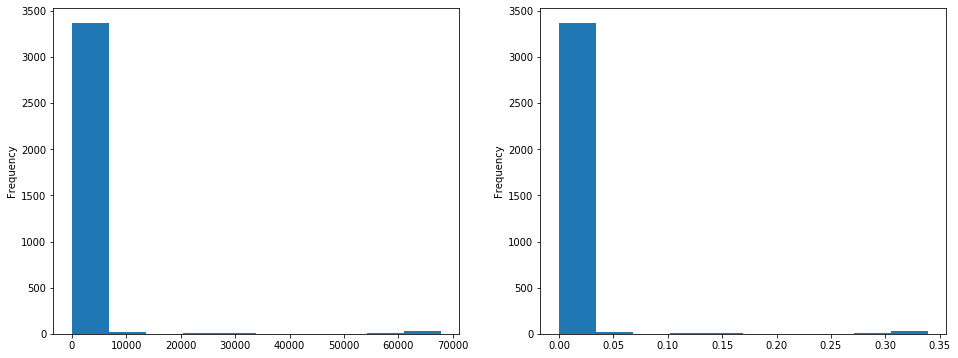

In [17]:
fix, ax = plt.subplots(figsize = (16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1)) # df['Confirmed'].values.reshape(-1,1)

s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1 # make sure that every value is positive

In [18]:
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.week

In [19]:
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)
        #df.loc[v.index, f'Confirmed_Rolling_Mean_Lag{d}'] = v['Confirmed'].shift(d).rolling(n_lags).mean()
        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]# + [c for c in df.columns if 'Confirmed_Rolling_Mean_Lag' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)

print(f'Dataframe shape {df.shape}')

Dataframe shape (3430, 38)


In [20]:
df.head()

,Outbreak,Country/Region,Province/State,Date,Confirmed,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),...,Confirmed_Lag_5,Confirmed_Transformed_Lag_5,Confirmed_Lag_4,Confirmed_Transformed_Lag_4,Confirmed_Lag_3,Confirmed_Transformed_Lag_3,Confirmed_Lag_2,Confirmed_Transformed_Lag_2,Confirmed_Lag_1,Confirmed_Transformed_Lag_1
0,COVID_2019,Australia,all,2020-03-13,1.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,COVID_2019,Australia,all,2020-03-13,0.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.000005
2,COVID_2019,Australia,all,2020-03-13,92.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000005,0.0,0.000000
3,COVID_2019,Australia,all,2020-03-13,1.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,0.0,0.0,0.0,0.000000,1.0,0.000005,0.0,0.000000,92.0,0.000460
4,COVID_2019,Australia,all,2020-03-13,35.0,Australia,OCEANIA,20264082.0,7686850.0,"2,6",...,0.0,0.0,1.0,0.000005,0.0,0.000000,92.0,0.000460,1.0,0.000005


In [21]:
from sklearn.preprocessing import LabelEncoder
enc_outb = LabelEncoder().fit(df['Outbreak'])
df['Outbreak_enc'] = enc_outb.transform(df['Outbreak'])

enc_ctry = LabelEncoder().fit(df['Country/Region'])
df['Country_enc'] = enc_ctry.transform(df['Country/Region'])

enc_region = LabelEncoder().fit(df['Region'])
df['Region_enc'] = enc_region.transform(df['Region'])

In [22]:

from sklearn.model_selection import train_test_split


X_mask_cat = ['Outbreak_enc','Region_enc', 'Month','Week']
train_test = df.loc[df['Confirmed'] > 50].copy()
s_unique_values = train_test[X_mask_lags].apply(lambda r: len(np.unique(r.values)), axis=1)
train_test = train_test.loc[s_unique_values > 1].copy()
print(f'Train/Test shape {train_test.shape}')

train, valid = train_test_split(train_test, test_size=0.2, shuffle=True, random_state=231451)

Train/Test shape (2177, 41)


In [23]:
from lightgbm import LGBMRegressor    
model_lgbm = LGBMRegressor(n_estimators=200, metric='mae', random_state=1234, min_child_samples=1)

print(f'Fitting on data with shape {train[X_mask_cat+X_mask_lags].shape} with validation of shape {valid[X_mask_cat+X_mask_lags].shape}')

model_lgbm.fit(X=train[X_mask_cat+X_mask_lags], y=train['Confirmed'], 
               eval_set=(valid[X_mask_cat+X_mask_lags], valid['Confirmed']),
               early_stopping_rounds=50, verbose=10)

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
from datetime import timedelta
pred_steps = 28

history = df.loc[(df['Outbreak']=='COVID_2019') & (df['Confirmed'] > 0) & (df['Country/Region']=='India')]
history0 = history.iloc[-1]

dt_rng = pd.date_range(start=history0['Date']+timedelta(days=1), 
                       end=history0['Date']+timedelta(days=pred_steps),freq='D').values
dt_rng = pd.to_datetime(dt_rng)

pred_months = pd.Series(dt_rng).apply(lambda dt: dt.month)
pred_weeks = pd.Series(dt_rng).apply(lambda dt: dt.week)

pred_cat = history0[X_mask_cat].values
pred_lags = history0[X_mask_lags].values
y = history0['Confirmed']

print('History 0: ', pred_lags)
pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
pred_lags[n_lags-1] = y  # Lag
#pred_lags[n_lags:] = np.roll(pred_lags[n_lags:], -1)
#pred_lags[-1] = np.mean(pred_lags[:n_lags]) # rolling_mean
print('Pred 0: ', pred_lags)

pred = np.zeros(pred_steps)
for d in range(pred_steps):     
    pred_cat[1] = pred_months[d]
    pred_cat[2] = pred_weeks[d]    
    
    y = model_lgbm.predict(np.hstack([pred_cat, pred_lags]).reshape(1,-1))[0]
    #print(f'Prediction body: ', np.hstack([pred_cat, pred_lags]).reshape(1,-1))
    print(f'Step {d}, predicted for {dt_rng[d].strftime("%Y-%m-%d")} is: {y}')
    
    pred_lags[:n_lags] = np.roll(pred_lags[:n_lags], -1)
    pred_lags[n_lags-1] = y  # Lag    
 #   pred_lags[n_lags:] = np.roll(pred_lags[n_lags:], -1)
 #   pred_lags[-1] = np.mean(pred_lags[n_lags:]) # rolling_mean

    pred[d] = y
    
preds = pd.Series(data=pred, index=dt_rng, name='LGBM predicted')